# **Project Name ✨ Titanic Dataset ✨**
AUTHOR : **Jamshed Butt** from **Data Science**

# **✨ Aim Of The Project ✨**

The aim of the Iris dataset is to facilitate research in pattern recognition, classification, and data analysis by providing measurements of iris flowers from three species, aiding in species differentiation.

# **Import Libraries**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

#Normalize Data
from sklearn.preprocessing import StandardScaler

#Conert Categorical to Numerical Value
from sklearn.preprocessing import LabelEncoder

#Columns Relationship for target value
from sklearn.feature_selection import mutual_info_classif,SelectKBest,f_classif

#Splitting Data
from sklearn.model_selection import train_test_split,cross_val_score

#PCA
from sklearn.decomposition import PCA

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn import metrics

# **Load Dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Univariate Analysis**

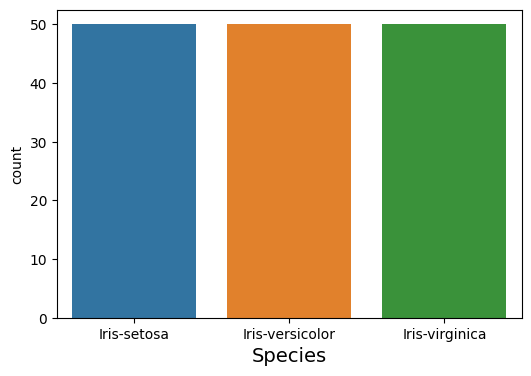

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="species",data=df)
plt.xlabel("Species",fontsize=14)
plt.show()

In [ ]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<ipython-input-9-e0a31f1805d9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["sepal_length"], kde=True, color="orange", bins=10)


<Axes: xlabel='sepal_length', ylabel='Density'>

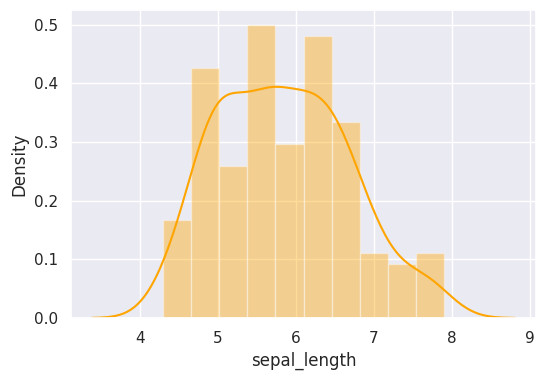

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["sepal_length"], kde=True, color="orange", bins=10)

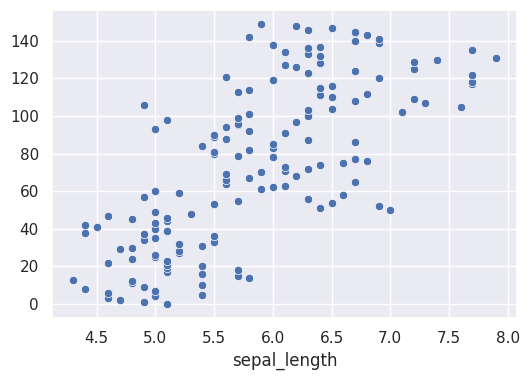

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="sepal_length",y=df.index,data=df)
plt.show()

<ipython-input-11-5b24ae600e6a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["sepal_width"], kde=True, color="orange", bins=10)


<Axes: xlabel='sepal_width', ylabel='Density'>

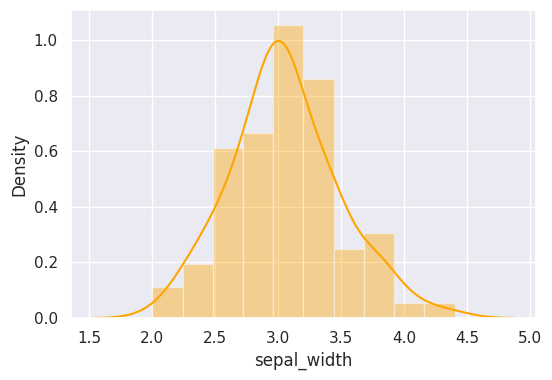

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["sepal_width"], kde=True, color="orange", bins=10)

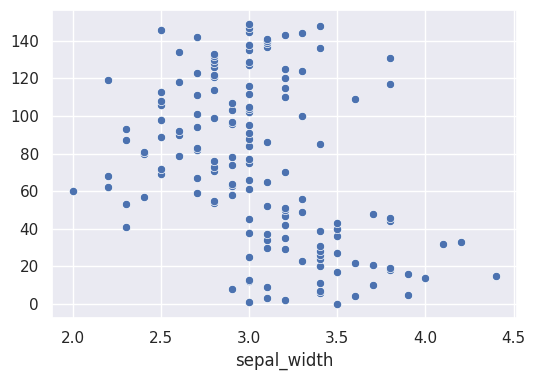

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="sepal_width",y=df.index,data=df)
plt.show()

<ipython-input-13-53ed0085d8fc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["petal_length"], kde=True, color="orange", bins=10)


<Axes: xlabel='petal_length', ylabel='Density'>

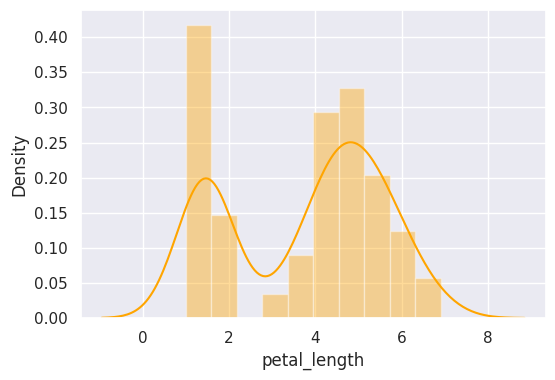

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["petal_length"], kde=True, color="orange", bins=10)

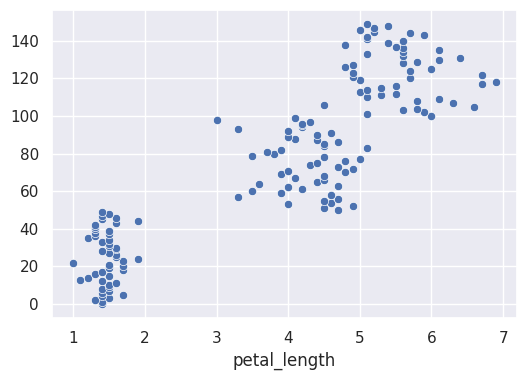

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="petal_length",y=df.index,data=df)
plt.show()

<ipython-input-15-6f7a78f94cf3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["petal_width"], kde=True, color="orange", bins=10)


<Axes: xlabel='petal_width', ylabel='Density'>

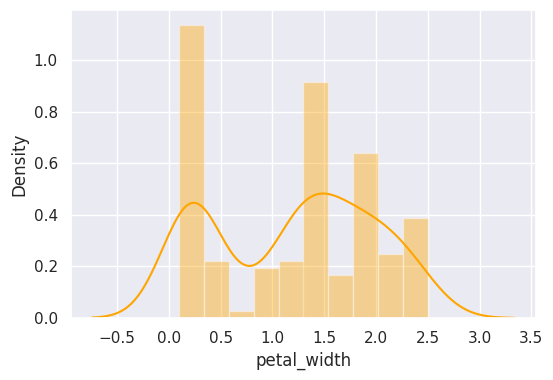

In [ ]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["petal_width"], kde=True, color="orange", bins=10)

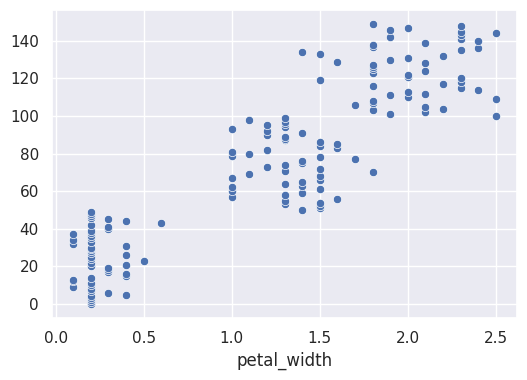

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="petal_width",y=df.index,data=df)
plt.show()

# **EDA (Exploratory Data Analysis)**

#### **Removeing Duplicate**

In [ ]:
duplicate = df.duplicated()
print(duplicate.sum())

3


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

#### **Check NaN Value And Remove NaN Values**

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### **Removing Outlier**

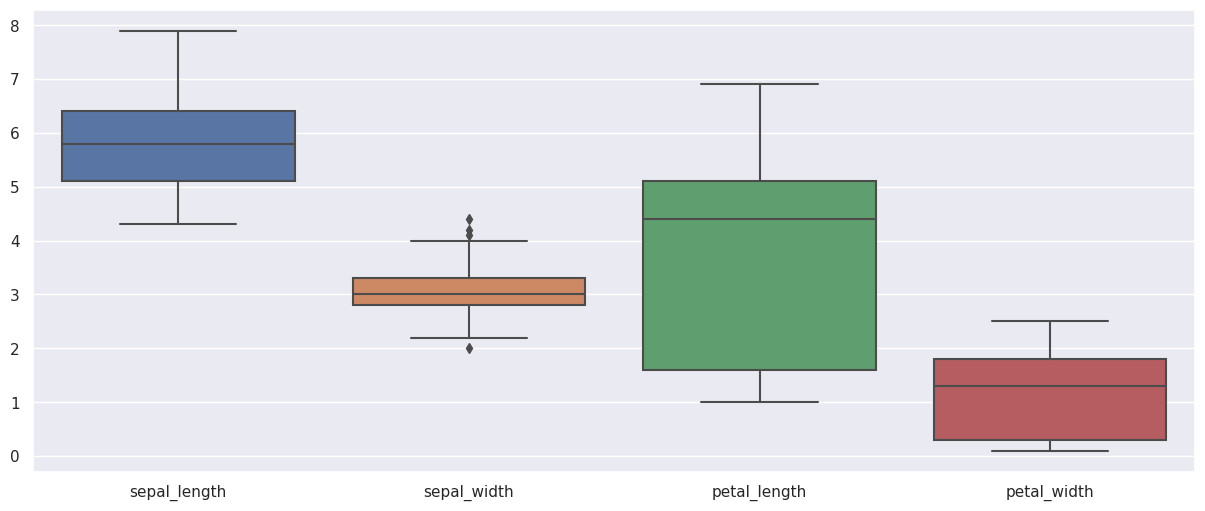

In [ ]:
num_cols = df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(15,6))
sns.boxplot(num_cols)
plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [ ]:
for i in num_cols.columns:
    lower_range,upper_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])

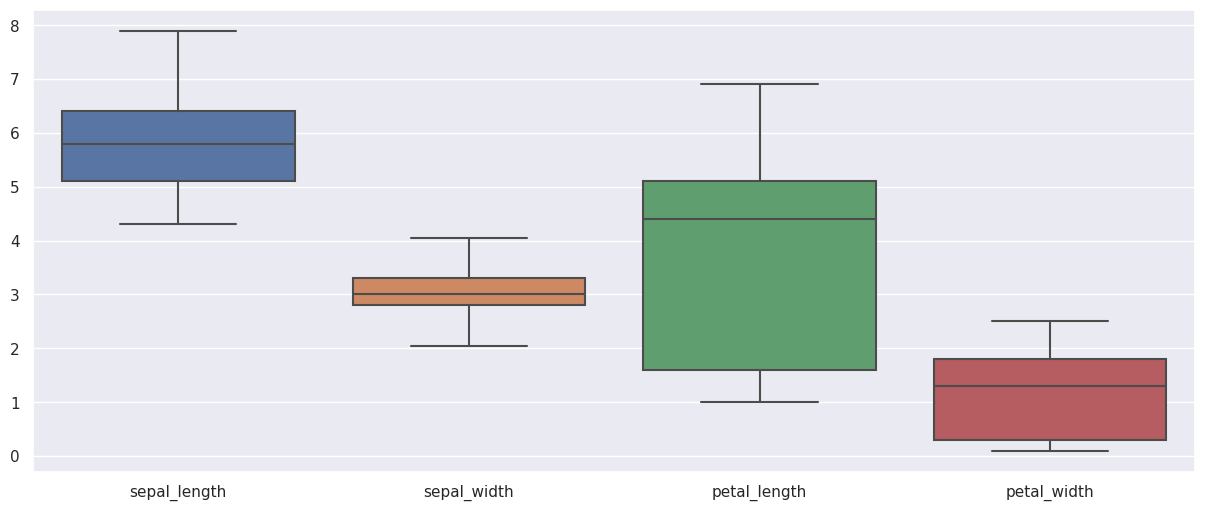

In [ ]:
num_cols = df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(15,6))
sns.boxplot(num_cols)
plt.show()

#### **Bivariate Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


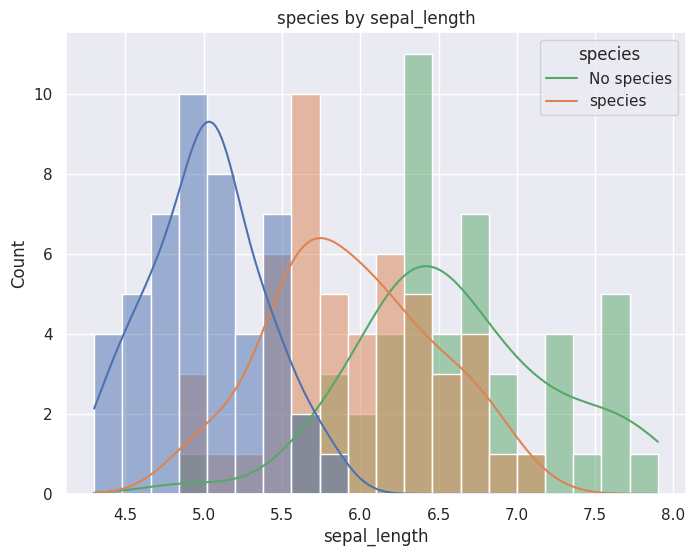

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sepal_length', hue='species', kde=True, bins=20)
plt.title('species by sepal_length')
plt.xlabel('sepal_length')
plt.ylabel('Count')
plt.legend(title='species', loc='upper right', labels=['No species', 'species'])
plt.show()

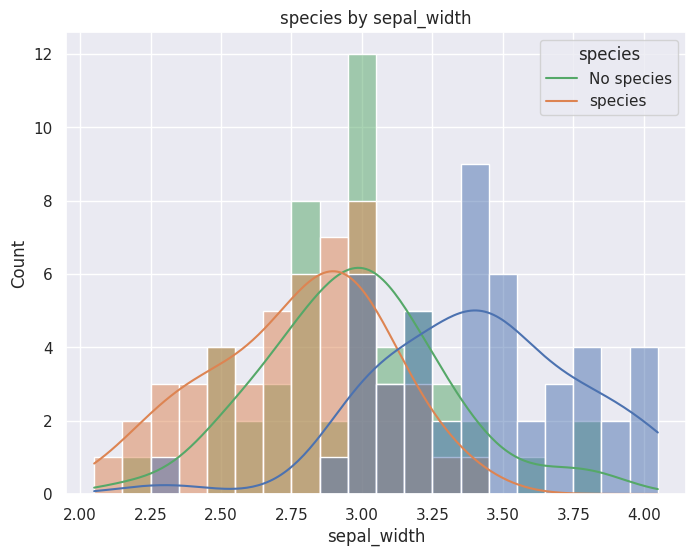

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sepal_width', hue='species', kde=True, bins=20)
plt.title('species by sepal_width')
plt.xlabel('sepal_width')
plt.ylabel('Count')
plt.legend(title='species', loc='upper right', labels=['No species', 'species'])
plt.show()

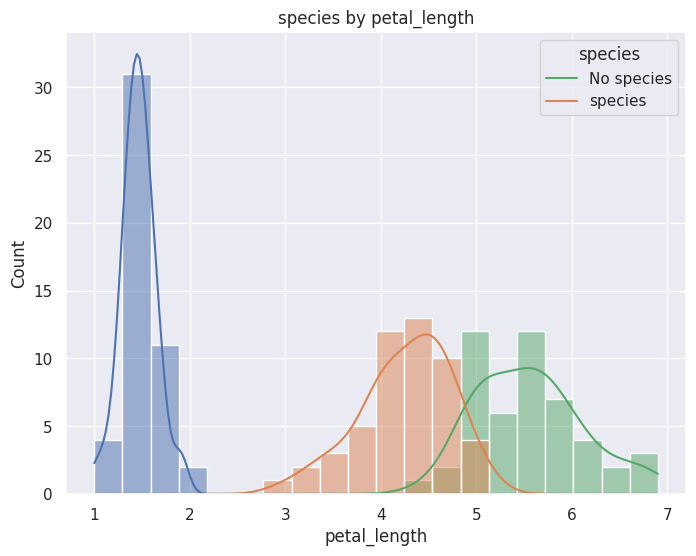

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='petal_length', hue='species', kde=True, bins=20)
plt.title('species by petal_length')
plt.xlabel('petal_length')
plt.ylabel('Count')
plt.legend(title='species', loc='upper right', labels=['No species', 'species'])
plt.show()

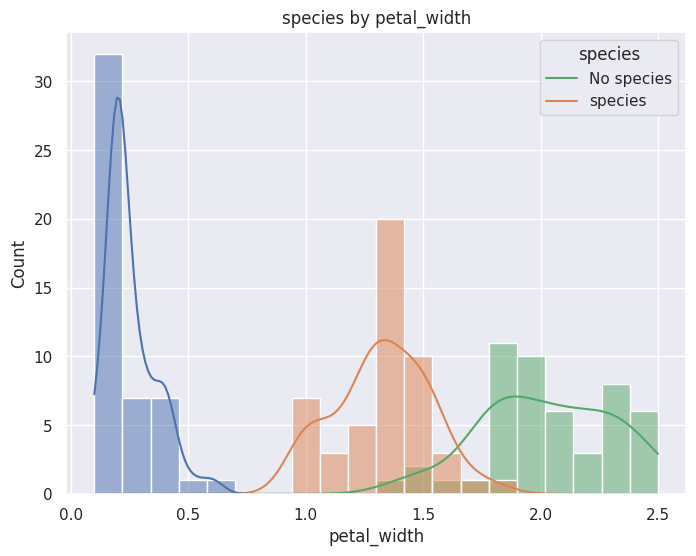

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='petal_width', hue='species', kde=True, bins=20)
plt.title('species by petal_width')
plt.xlabel('petal_width')
plt.ylabel('Count')
plt.legend(title='species', loc='upper right', labels=['No species', 'species'])
plt.show()

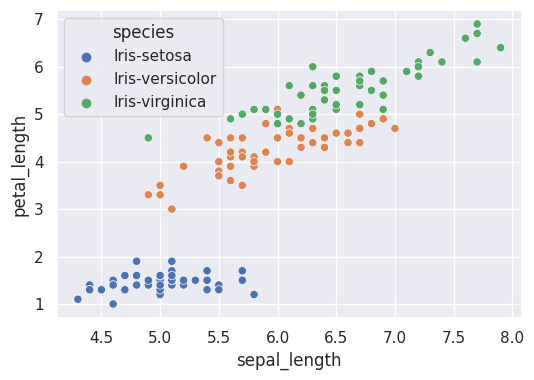

In [ ]:
sns.scatterplot(x="sepal_length",y="petal_length",data=df,hue="species")
plt.show()

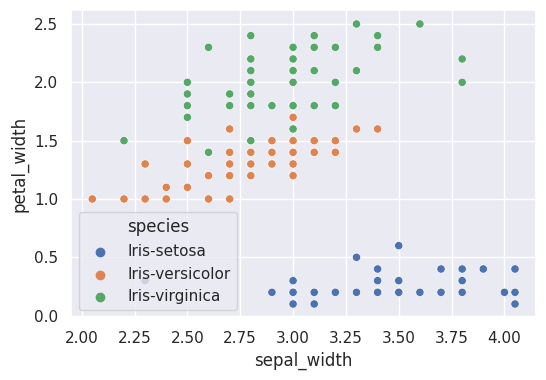

In [ ]:
sns.scatterplot(x="sepal_width",y="petal_width",data=df,hue="species")
plt.show()

<ipython-input-32-1f8db7c938a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

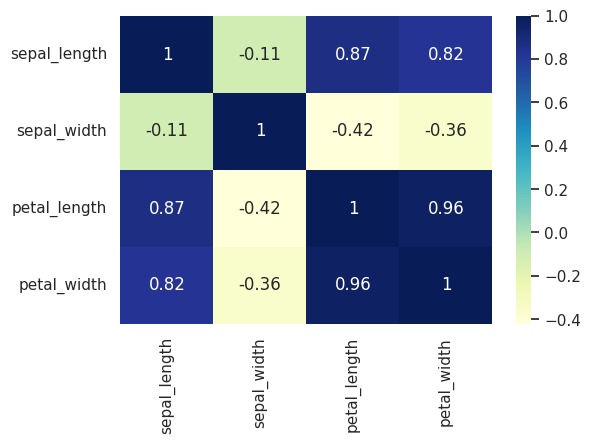

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

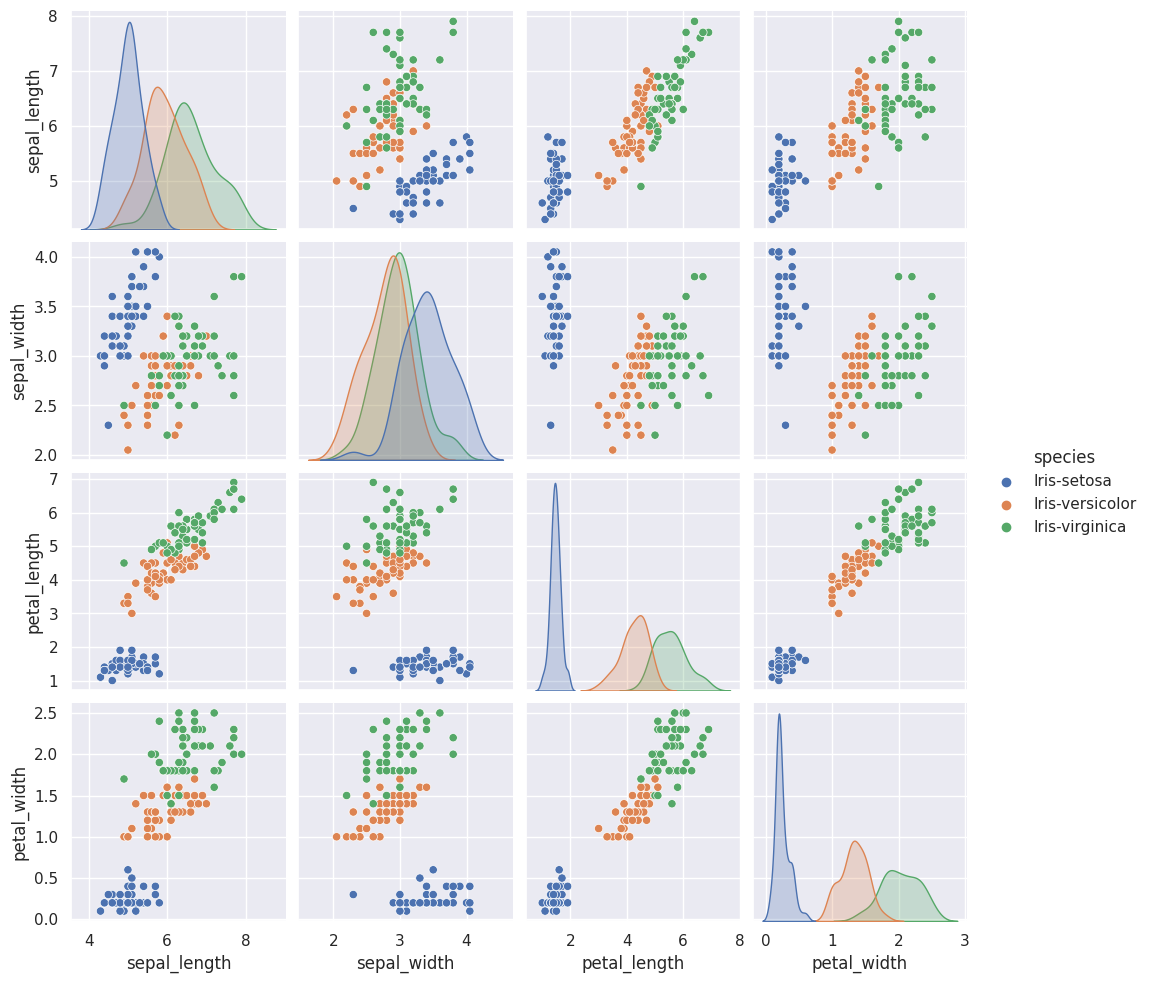

In [63]:
sns.pairplot(df,hue="species")
plt.show()

<ipython-input-33-d3397ca1f647>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


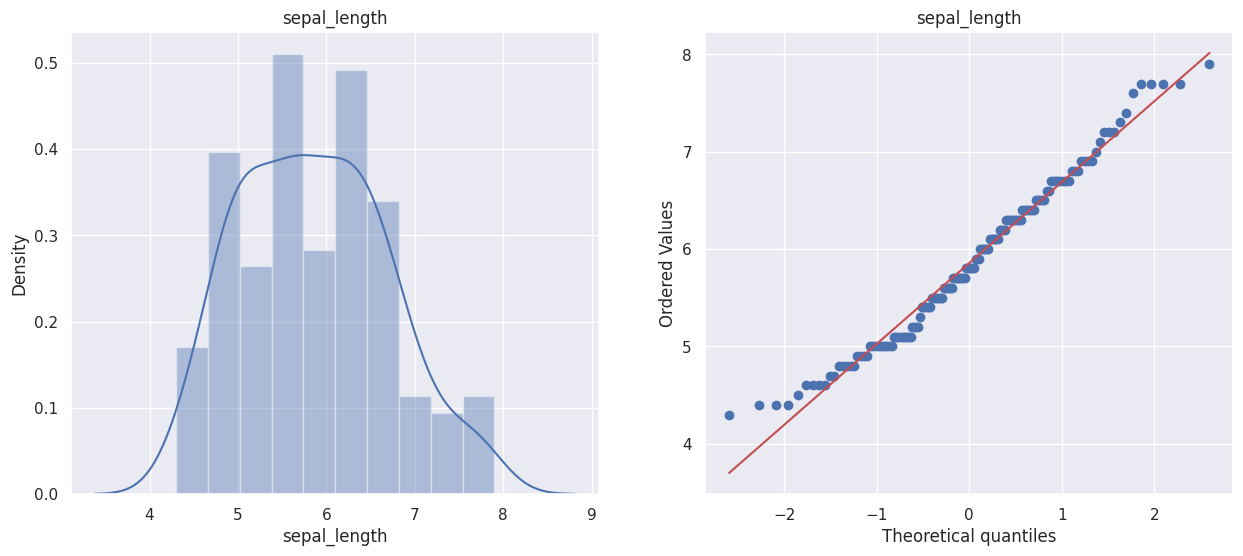

<ipython-input-33-d3397ca1f647>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


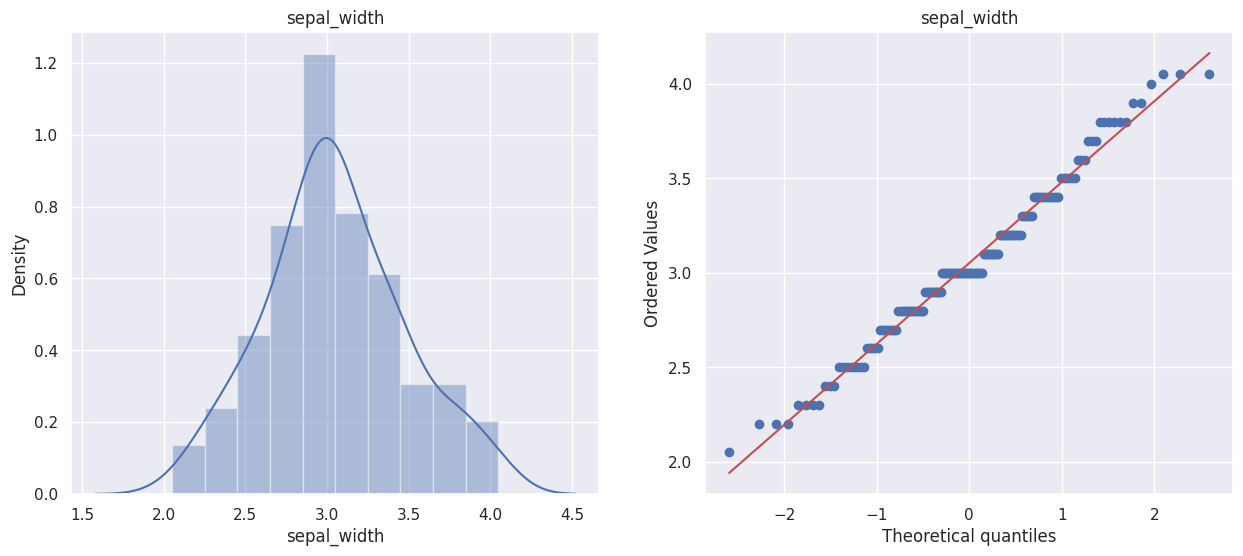

<ipython-input-33-d3397ca1f647>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


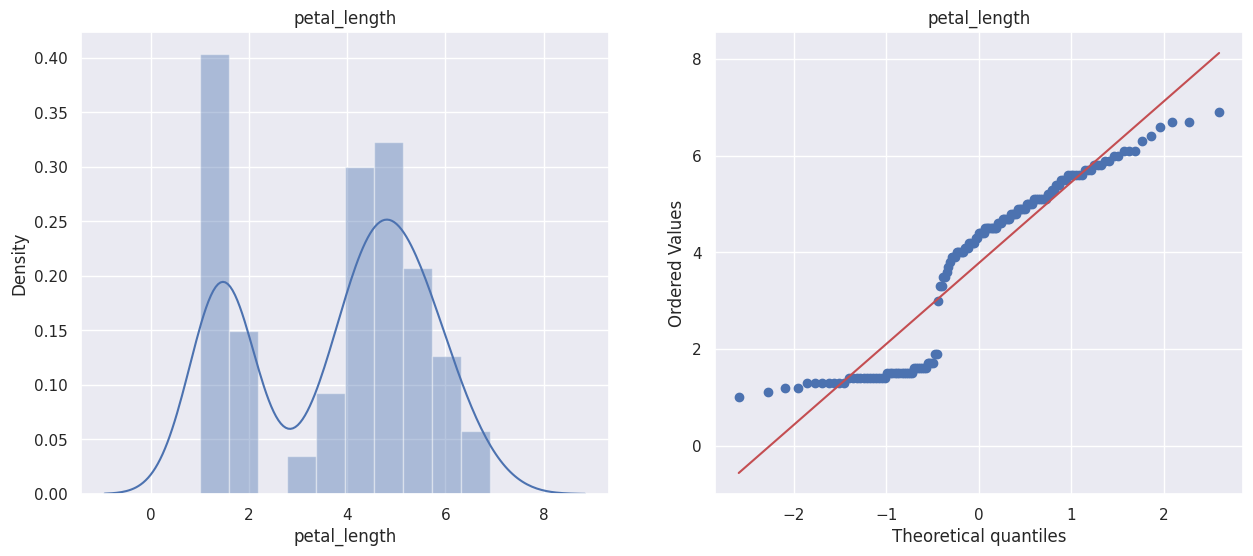

<ipython-input-33-d3397ca1f647>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


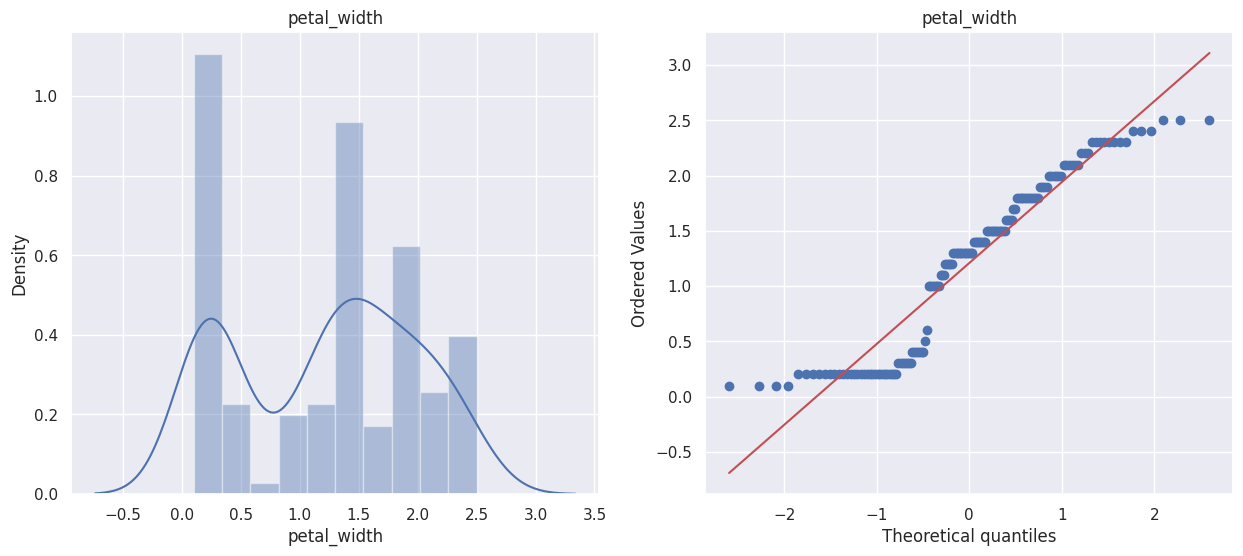

In [ ]:
def plots(num_cols, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #num_cols[variable].hist()
    sns.distplot(num_cols[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(num_cols[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in num_cols.columns:
  plots(num_cols, i)

# **Feature Engineering**

#### **Mutual Information**

In [ ]:
X = df.iloc[:,:4]
Y = df["species"]

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
mi_score = mutual_info_classif(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

sepal_width     0.264381
sepal_length    0.493026
petal_width     0.970660
petal_length    0.981816
dtype: float64

<Axes: >

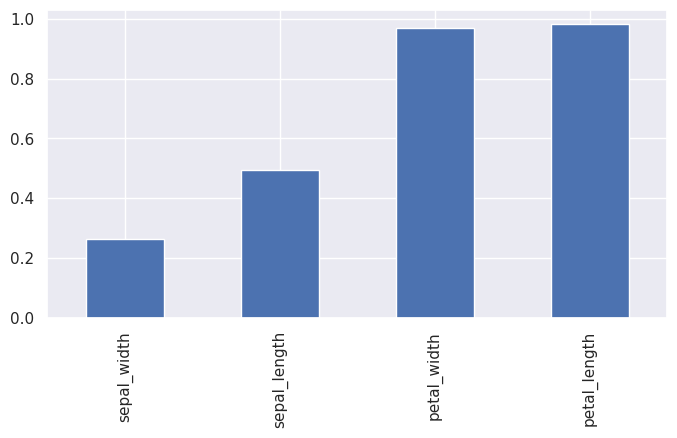

In [ ]:
mi_score.sort_values(ascending=True).plot.bar(figsize=(8, 4))

#### **Spliting Data into Train and Test**

In [ ]:
train_data,test_data,train_label,test_label = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (117, 4)
train_label :  (117,)
test_data :  (30, 4)
test_label :  (30,)


#### **Normalizing Data**

In [ ]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [ ]:
train_data_sc

array([[ 0.13678852, -0.33976781,  0.38847688,  0.37031498],
       [-0.22694459,  1.78352895, -1.22247282, -1.23438326],
       [-1.56063265,  0.36799778, -1.39507457, -1.36810811],
       [ 1.22798785,  0.13207591,  0.61861255,  0.37031498],
       [-0.95441081,  1.78352895, -1.28000674, -1.36810811],
       [-1.43938829,  0.36799778, -1.45260849, -1.36810811],
       [ 0.98549911,  0.13207591,  0.33094296,  0.23659012],
       [-0.5906777 ,  1.54760709, -1.33754066, -1.36810811],
       [ 0.25803289, -1.0475334 ,  1.02134998,  0.23659012],
       [ 1.59172095,  1.31168522,  1.30901957,  1.70756351],
       [ 0.01554415, -0.10384595,  0.21587513,  0.37031498],
       [ 1.10674348, -0.10384595,  0.96381606,  1.1726641 ],
       [ 0.25803289, -0.33976781,  0.50354472,  0.23659012],
       [ 0.86425474, -0.10384595,  0.33094296,  0.23659012],
       [ 1.59172095,  0.36799778,  1.25148565,  0.77148954],
       [ 0.98549911,  0.13207591,  1.02134998,  1.57383866],
       [ 0.74301037, -0.

# **Model**

#### **Logistic Regression**

In [ ]:
model_lr = LogisticRegression().fit(train_data_sc,train_label)

In [ ]:
y_pred_1 = model_lr.predict(test_data_sc)
y_pred_1

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
accuracy_score(y_pred_1,test_label)

1.0

In [ ]:
confusion_matrix(y_pred_1,test_label)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]])

In [ ]:
print(classification_report(y_pred_1,test_label))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# **Random Forest Model**

In [ ]:
model_rf = RandomForestClassifier().fit(train_data_sc,train_label)

In [ ]:
y_pred_2 = model_rf.predict(test_data_sc)

In [ ]:
print("Train Data Accuracy :",(model_rf.score(train_data_sc,train_label)))
print("Test Data Accuracy :",(accuracy_score(y_pred_2,test_label)))

Train Data Accuracy : 1.0
Test Data Accuracy : 0.9666666666666667


In [ ]:
confusion_matrix(y_pred_2,test_label)

array([[11,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  8]])

In [ ]:
print(classification_report(y_pred_2,test_label))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# **KNN Model**

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3).fit(train_data_sc,train_label)

In [ ]:
y_pred_3 = model_knn.predict(test_data_sc)

In [72]:
print("Test Data Accuracy :",(accuracy_score(y_pred_3,test_label)))

Test Data Accuracy : 0.9666666666666667


In [ ]:
confusion_matrix(y_pred_3,test_label)

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  9]])

In [ ]:
print(classification_report(y_pred_3,test_label))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

